In [101]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [102]:
# Load given train and test datasets
train_data = pd.read_csv("../data/training/training.csv")
test_data = pd.read_csv("../data/test/test.csv")

In [103]:
# Check train data dimensions
train_data.shape # 7049 examples or images

(7049, 31)

In [104]:
train_data.head().T 


,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


15 facial key points each with x and y co-ordinates. Last one is an image with row-ordered pixel values separated by space.

So now the image data will our input and the facial keypoint coordinates for the 15 facial keypoints will be labels to predict.

In [105]:
print(train_data.count())

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

It seems like the facial keypoints are not labeled consistently for all the 7049 examples(images) in the train data.


In [106]:
# How many facial key points have no data
print("Count of facial key points with missing coordinates:")
print(train_data.isnull().any().value_counts())

Count of facial key points with missing coordinates:
True     28
False     3
dtype: int64


So there are 28 facial key points with missing data. 3 of them have all the data. Let's check more details.

In [107]:
# Check count of missing data fpr all 15 facial keypoints
train_data.isnull().sum().sort_values(ascending=False)

left_eyebrow_outer_end_y     4824
left_eyebrow_outer_end_x     4824
right_eyebrow_outer_end_y    4813
right_eyebrow_outer_end_x    4813
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
mouth_left_corner_y          4780
mouth_left_corner_x          4780
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
right_eyebrow_inner_end_y    4779
right_eyebrow_inner_end_x    4779
mouth_right_corner_x         4779
mouth_right_corner_y         4779
left_eye_inner_corner_y      4778
left_eye_inner_corner_x      4778
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_y      33
mouth_center_bottom_lip_x      33
right_eye_center_y             13
right_eye_center_x             13
left_eye_center_y              10
left_eye_center_x              10
nose_tip_x                      0
nose_tip_y    

Except for nose_tip facial key point and the image data, rest of the keypoints have data missing. 
For now, remove the rows with missing data.

Before that let's split the data into train and dev datasets.

In [113]:
# Shuffle data before split
np.random.seed(533)
shuffle = np.random.permutation(np.arange(train_data.shape[0]))
train_data = train_data.iloc[shuffle].reset_index(drop=True)

In [114]:
# First convert the image pixels into numpy array
image_list = []
for i in range(train_data.shape[0]):
    pixel_list = train_data['Image'][i].split(' ')
    pixel_list = ['0' if j == '' else j for j in pixel_list]
    image_list.append(pixel_list)
    
#train_data['Image'] = train_data['Image'].apply(lambda im: np.fromstring(im, sep = ' '))

In [115]:
# Split the image_list(input) into train and dev datasets(80:20 split)
X = np.array(image_list, dtype = 'float')
X_train, X_dev = X[:5640], X[5640:]
print(X_train.shape, X_dev.shape)

(5640, 9216) (1409, 9216)


In [117]:
# Split the labels( facial key point coordinates) into train and dec datasets(80:20 split)
keypoints = train_data.drop('Image', axis = 1)
Y = np.array(keypoints, dtype = 'float')
Y_train, Y_dev = Y[:5640], Y[5640:]
print(Y_train.shape, Y_dev.shape)

(5640, 30) (1409, 30)


In [118]:
# Now remove the rows with missing data in both train and dev datasets
X_train_trim = X_train[~np.isnan(Y_train).any(axis=1)]
Y_train_trim = Y_train[~np.isnan(Y_train).any(axis=1)]
X_dev_trim = X_dev[~np.isnan(Y_dev).any(axis=1)]
Y_dev_trim = Y_dev[~np.isnan(Y_dev).any(axis=1)]

In [119]:
print(X_train_trim.shape)
print(Y_train_trim.shape)
print(X_dev_trim.shape)
print(Y_dev_trim.shape)

(1753, 9216)
(1753, 30)
(387, 9216)
(387, 30)


In [120]:
# Create a trimmed copy of train_data with by omitting all rows with missing data
#train_data_trim = train_data.dropna()
#print(train_data_trim.isnull().any().value_counts())

In [121]:
# Check test data dimensions
test_data.shape # 1783 test examples or images

(1783, 2)

In [122]:
test_data.head().T # Each example conrains ImageId and image data with row-ordered list of pixel values

,0,1,2,3,4
ImageId,1,2,3,4,5
Image,182 183 182 182 180 180 176 169 156 137 124 10...,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...,177 176 174 170 169 169 168 166 166 166 161 14...,176 174 174 175 174 174 176 176 175 171 165 15...,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


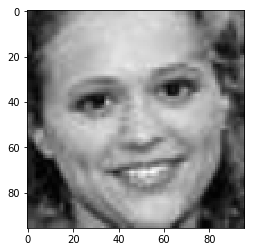

In [123]:
# Display sample image
plt.imshow(X_train[533].reshape(96,96),cmap='gray')
plt.show()